In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [200]:
bite = pd.read_csv('Health_AnimalBites.csv')

# Louisville Metro Department of Public Health and Wellness
# https://www.kaggle.com/datasets/rtatman/animal-bites

In [4]:
bite['SpeciesIDDesc'].unique()

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', nan, 'HORSE',
       'SKUNK', 'FERRET'], dtype=object)

In [5]:
bite.isna().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

In [9]:
bite['victim_zip'].unique()

array(['40229', '40218', '40219', nan, '40211', '40203', '40215', '40210',
       '40206', '40291', '40272', '40165', '40299', '40220', '40241',
       '40228', '40216', '40071', '40031', '40217', '40222', '40214',
       '40204', '40208', '40205', '40207', '40223', '40258', '40245',
       '42784', '40118', '46011', '40212', '40059', '40014', '40242',
       '47150', '40047', '40243', '40006', '40213', '87604', '42027',
       '47106', '48162', '47129', '40023', '47119-9567', '47135', '47130',
       '40202', '40108', '40252-0551', '40004', '42441', '40156', '40160',
       '40013', '40209', '47164', '61822', '45140', '40077', '47111',
       '40509', '40505', '42701', '42690-2', '20151', '40231', '41472',
       '40150', '40041', '47172', '40019', '47112', '47142', '77701',
       '40270', '47122', '40062', '41016', '40027', '40331', '40025',
       '40065', '47119', '40422', '40268', '54568', '40033', '42765',
       '47166', '42718', '45331', '40037', '29455', '95831', '40142',
   

In [32]:
search = SearchEngine()

bite['state'] = None

for index, zip_code in enumerate(bite['victim_zip']):
    result = search.by_zipcode(zip_code)
    if result:
        bite.at[index, 'state'] = result.state

In [34]:
bite['state'].unique()

array(['KY', None, 'IN', 'MI', 'IL', 'OH', 'VA', 'TX', 'WI', 'SC', 'CA',
       'NY', 'GA', 'NC', 'WA', 'TN', 'IA', 'MS', 'FL', 'PA', 'MO', 'LA',
       'UT', 'AL', 'CT', 'DC', 'AK', 'CO', 'OK', 'NV'], dtype=object)

In [39]:
state_counts = bite.groupby('state').size().reset_index(name='count')

,state,count
0,AK,1
1,AL,4
2,CA,2
3,CO,1
4,CT,1
5,DC,1
6,FL,6
7,GA,2
8,IA,2
9,IL,4


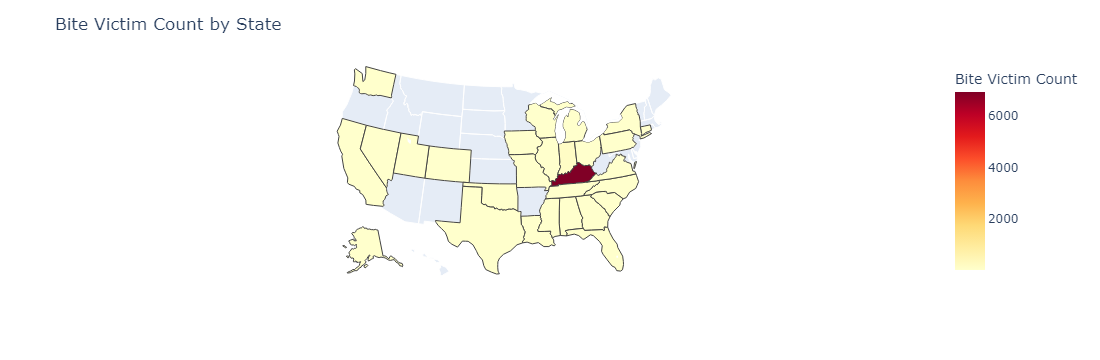

In [78]:
import plotly.express as px

# Assuming state_counts is your DataFrame containing state and count data


# Create a choropleth map using Plotly Express
fig = px.choropleth(state_counts, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='count',
                    scope='usa',  # Set the map scope to USA
                    color_continuous_scale='YlOrRd',  # Use the 'YlOrRd' color scale
                    labels={'count': 'Bite Victim Count'}  # Set label for color scale
                   )

# Update layout properties
fig.update_layout(
    title='Bite Victim Count by State',  # Set the title of the plot
    geo=dict(
        showcoastlines=True,  # Show coastlines on the map
    )
)

# Show the plot
fig.show()

In [63]:
bite['SpeciesIDDesc'].value_counts()

SpeciesIDDesc
DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: count, dtype: int64

all from Kentucky


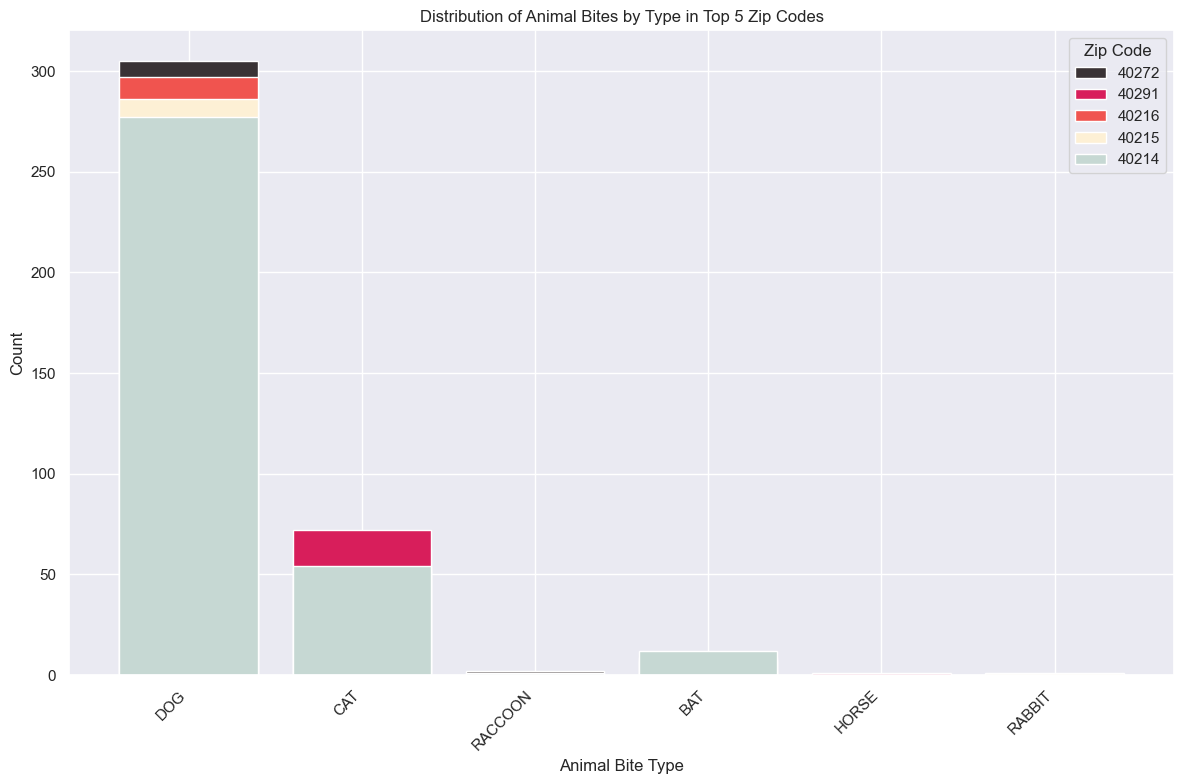

In [77]:
# zipcodes and types of bites

# Step 1: Calculate the top 5 most common zip codes
# bite['victim_zip'].dropna(inplace=True)
top_5_zipcodes = bite['victim_zip'].value_counts().head(5).index.tolist()

# Step 2: Calculate the distribution of animal bites by type for each of the top 5 zip codes
zipcodes_data = []
for zipcode in top_5_zipcodes:
    # Filter the DataFrame for the current zip code
    zip_data = bite[bite['victim_zip'] == zipcode]
    # Count the occurrences of each animal bite type
    bite_counts = zip_data['SpeciesIDDesc'].value_counts()
    # Append the zip code and the distribution of animal bites by type to the list
    zipcodes_data.append((zipcode, bite_counts))

# Step 3: Create a grouped bar chart to visualize the distribution of animal bites by type for each of the top 5 zip codes
plt.figure(figsize=(12, 8))
colors = ['#3A3335', '#D81E5B', '#F0544F', '#FDF0D5', '#C6D8D3']  # Color for each zip code

for i, (zipcode, bite_counts) in enumerate(zipcodes_data):
    plt.bar(bite_counts.index, bite_counts.values, color=colors[i], label=zipcode)

print('all from Kentucky')

plt.title('Distribution of Animal Bites by Type in Top 5 Zip Codes')
plt.xlabel('Animal Bite Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Zip Code')
plt.tight_layout()
plt.show()

# Are some dog breeds more likely to bite?

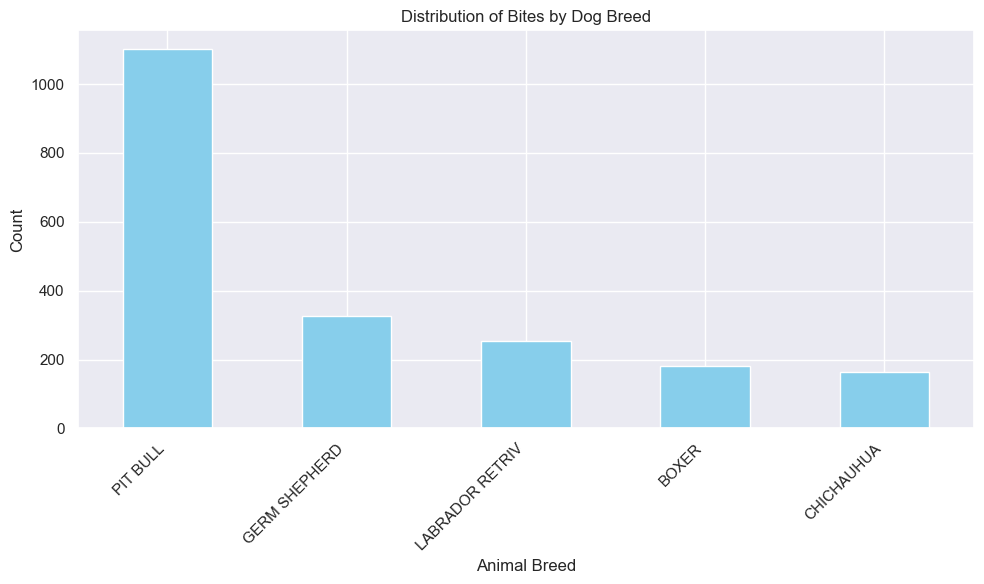

In [88]:
# dog bites per breed

# Count the occurrences of each animal breed involved in bites
dog_bite = bite[bite['SpeciesIDDesc'] == 'DOG']
dog_counts = dog_bite['BreedIDDesc'].value_counts().head(5)

# Create a bar chart to visualize the distribution of animal breeds involved in bites
plt.figure(figsize=(10, 6))
dog_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bites by Dog Breed')
plt.xlabel('Animal Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# What factors are most strongly associated with a positive rabies ID?

In [126]:
bite.isna().sum()

bite_date            0
SpeciesIDDesc        0
BreedIDDesc          0
GenderIDDesc         0
color                0
vaccination_yrs      0
vaccination_date     0
victim_zip           0
AdvIssuedYNDesc      0
WhereBittenIDDesc    0
quarantine_date      0
DispositionIDDesc    0
head_sent_date       0
release_date         0
ResultsIDDesc        0
dtype: int64

In [201]:
# replace nan values

# Replace NaN values in 'bite_date' with the nearest available date
bite['bite_date'] = pd.to_datetime(bite['bite_date'], errors='coerce')
bite['bite_date'] = bite['bite_date'].fillna(method='ffill').fillna(method='bfill')

# Convert 'bite_date' to datetime
bite['bite_date'] = pd.to_datetime(bite['bite_date'])

# Replace missing categorical variables with most frequent category
categorical_columns = ['SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color']
for column in categorical_columns:
    bite[column].fillna(bite[column].mode()[0], inplace=True)

# Use a placeholder value for missing vaccination years and dates
bite['vaccination_yrs'].fillna(-1, inplace=True)
bite['vaccination_date'].fillna('UNKNOWN', inplace=True)

# Replace missing victim zip codes with most frequent zip code
bite['victim_zip'].fillna(bite['victim_zip'].mode()[0], inplace=True)

# Use "Unknown" for missing values in categorical columns
other_categorical_columns = ['AdvIssuedYNDesc', 'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc']
for column in other_categorical_columns:
    bite[column].fillna('UNKNOWN', inplace=True)

# Use a placeholder value or fill with nearby dates for date columns
date_columns = ['head_sent_date', 'release_date']
for column in date_columns:
    bite[column].fillna('UNKNOWN', inplace=True)  # Or use forward/backward filling if applicable

# Use "Unknown" for missing results or drop rows with missing values
bite['ResultsIDDesc'].fillna('NOT GIVEN', inplace=True)  # Or drop rows: df.dropna(subset=['ResultsIDDesc'], inplace=True)

bite

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05,DOG,PIT BULL,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
1,1986-02-12,DOG,PIT BULL,UNKNOWN,BRO & BLA,-1.0,UNKNOWN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
2,1987-05-07,DOG,PIT BULL,UNKNOWN,BLACK,-1.0,UNKNOWN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
3,1988-10-02,DOG,PIT BULL,MALE,BLA & BRO,-1.0,UNKNOWN,40272,NO,BODY,1990-10-02 00:00:00,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
4,1989-08-29,DOG,PIT BULL,FEMALE,BLK-WHT,-1.0,UNKNOWN,40272,NO,BODY,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2017-09-05,DOG,PIT BULL,MALE,BLACK,-1.0,UNKNOWN,40243,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NOT GIVEN
8999,2017-09-07,DOG,POMERANIAN,MALE,RED,-1.0,UNKNOWN,40204,UNKNOWN,HEAD,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NOT GIVEN
9000,2017-09-07,DOG,LABRADOR RETRIV,MALE,BROWN,-1.0,UNKNOWN,47130,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NOT GIVEN
9001,2017-09-07,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,-1.0,UNKNOWN,40229,UNKNOWN,BODY,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NOT GIVEN


In [202]:
# Log Reg

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Exclude 'ResultsIDDesc' column
X_subset = bite.drop(columns=['ResultsIDDesc', 'bite_date'])

# Create dummy variables for remaining columns
X = pd.get_dummies(X_subset)

# Y: outcome variable
y = bite['ResultsIDDesc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

coef = model.coef_
intercept = model.intercept_
print("Coefficients:", coef)
print("Intercept:", intercept)

Accuracy: 0.9727928928373126
Coefficients: [[-1.88255671e-01 -4.21236246e-01  3.74648631e-01 ... -4.71685211e-04
  -2.33144594e-04 -7.33916414e-01]
 [ 2.39916095e-01 -1.00723795e+00  3.45971824e-01 ...  4.48197583e-04
   2.08294471e-04 -8.07824003e-01]
 [-1.72347739e-02  6.00352009e-01 -2.18871959e-01 ...  1.27680453e-06
   3.13834026e-06 -2.47100307e-02]
 [-3.44256502e-02  8.28122183e-01 -5.01748496e-01 ...  2.22108234e-05
   2.17117828e-05  1.56645045e+00]]
Intercept: [ 2.80446041  0.55846749 -3.10657382 -0.25635409]


c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [203]:
coefficients = model.coef_[0]

feature_names = X.columns
coefficient_dict = dict(zip(feature_names, coefficients))

# Sort the dictionary by coefficient values in ascending order
sorted_coefficients_asc = sorted(coefficient_dict.items(), key=lambda x: x[1])

# Convert the dictionary to a DataFrame
df_coefficients = pd.DataFrame(list(coefficient_dict.items()), columns=['Feature', 'Coefficient'])

# Sort the DataFrame by coefficient values in ascending order
df_coefficients_sorted = df_coefficients.sort_values(by='Coefficient', ascending=True)

df_coefficients_sorted

,Feature,Coefficient
4105,head_sent_date_UNKNOWN,-3.131589
84,BreedIDDesc_PIT BULL,-1.113374
3029,victim_zip_40214,-0.892764
3997,head_sent_date_2016-07-22 00:00:00,-0.850690
4005,head_sent_date_2016-08-03 00:00:00,-0.819975
...,...,...
3045,victim_zip_40243,0.724630
4246,release_date_2015-09-01 00:00:00,0.794716
3168,AdvIssuedYNDesc_UNKNOWN,0.796271
2933,vaccination_date_UNKNOWN,0.801265


In [204]:
df_species_coefficients = df_coefficients_sorted[df_coefficients_sorted['Feature'].str.startswith('SpeciesIDDesc')]
df_species_coefficients

,Feature,Coefficient
1,SpeciesIDDesc_BAT,-0.421236
7,SpeciesIDDesc_RABBIT,-0.329526
3,SpeciesIDDesc_DOG,-0.213970
5,SpeciesIDDesc_HORSE,-0.023588
4,SpeciesIDDesc_FERRET,-0.006829
9,SpeciesIDDesc_SKUNK,-0.004880
6,SpeciesIDDesc_OTHER,0.045172
2,SpeciesIDDesc_CAT,0.374649
8,SpeciesIDDesc_RACCOON,0.516697


In [205]:
df_coefficients_sorted[df_coefficients_sorted['Feature'].str.startswith('BreedIDDesc')]

,Feature,Coefficient
84,BreedIDDesc_PIT BULL,-1.113374
51,BreedIDDesc_DALMATIAN,-0.199605
42,BreedIDDesc_CHICHAUHUA,-0.082712
50,BreedIDDesc_DACHSHUND,-0.060171
62,BreedIDDesc_GOLD RETRIEVER,-0.047172
...,...,...
99,BreedIDDesc_SHIH TZU,0.137299
29,BreedIDDesc_BORDER COLLIE,0.146378
73,BreedIDDesc_LABRADOR RETRIV,0.281147
78,BreedIDDesc_MASTIF,0.309243


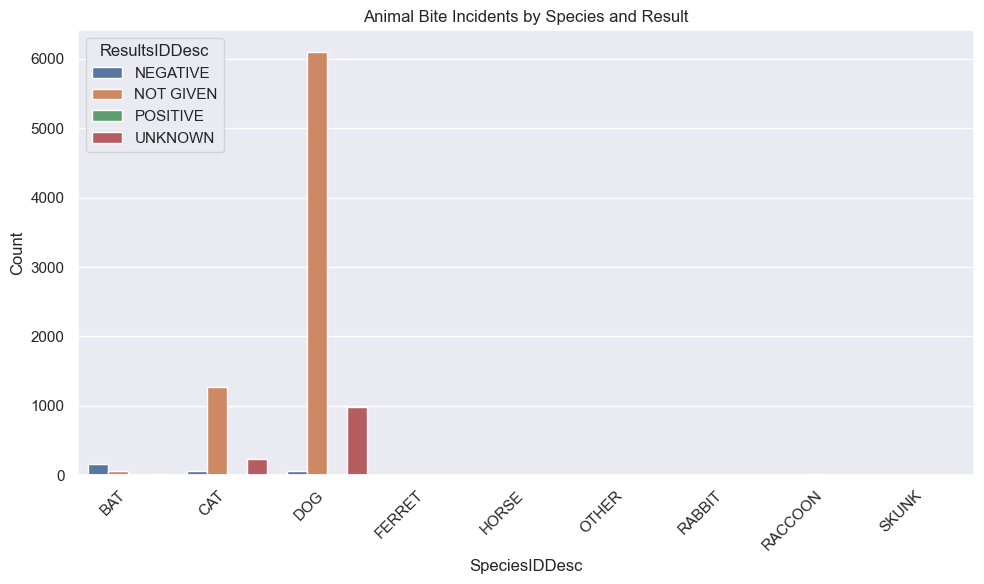

In [206]:
bite_no_unknown = bite[bite['ResultsIDDesc'] != 'UNKNOWN']
# count_df = bite_no_unknown.groupby(['SpeciesIDDesc', 'ResultsIDDesc']).size().reset_index(name='Count')
count_df = bite.groupby(['SpeciesIDDesc', 'ResultsIDDesc']).size().reset_index(name='Count')

# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=count_df, x='SpeciesIDDesc', y='Count', hue='ResultsIDDesc')
plt.xticks(rotation=45, ha='right')
plt.xlabel('SpeciesIDDesc')
plt.ylabel('Count')
plt.title('Animal Bite Incidents by Species and Result')
plt.tight_layout()
plt.show()

In [147]:
bite['ResultsIDDesc'].value_counts()

ResultsIDDesc
UNKNOWN     1240
NEGATIVE     299
POSITIVE       4
Name: count, dtype: int64

In [192]:
# reset button
bite = pd.read_csv('Health_AnimalBites.csv')

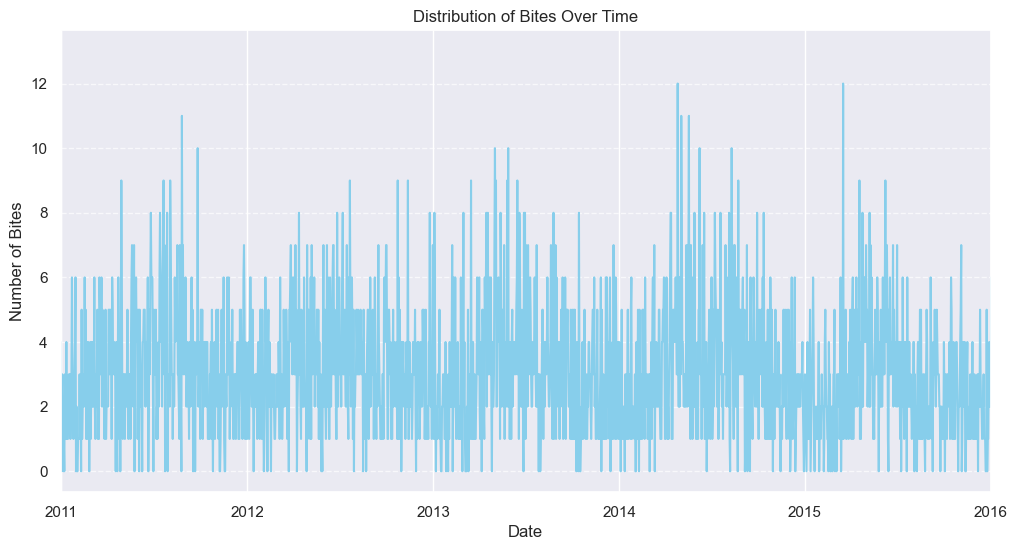

In [195]:
# Timeline of Bites (Daily)

# from ipywidgets import interact, widgets

# need to reset everytime for some reason
bite = pd.read_csv('Health_AnimalBites.csv')

### FIX DATE ERRORS
bite.loc[1384, 'bite_date'] = pd.Timestamp('2013-07-15')
bite.loc[1385, 'bite_date'] = pd.Timestamp('2013-07-15')

# Convert 'bite_date' to datetime if it's not already in datetime format
bite['bite_date'] = pd.to_datetime(bite['bite_date'], errors='coerce')

### FIX MORE DATE ERRORS

# Identify rows where 'bite_date' is beyond 2024
rows_beyond_2024 = bite[bite['bite_date'].dt.year > 2024]

# Replace the year with 2001 for the identified rows
bite.loc[rows_beyond_2024.index, 'bite_date'] = bite.loc[rows_beyond_2024.index, 'bite_date'].apply(lambda x: x.replace(year=2001))


# # Drop rows with NaT (Not a Time) values, which represent out-of-range datetime values
# bite.dropna(subset=['bite_date'], inplace=True)

# Set 'bite_date' as the index
bite.set_index('bite_date', inplace=True)

# Resample the data to daily frequency and count the number of bites per day
daily_distribution = bite.resample('D').size()

# Define the start and end dates
start_date = '2010-12-31'
end_date = '2016-01-01'

# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Plot the distribution
plt.figure(figsize=(12, 6))
daily_distribution.plot(color='skyblue')
plt.title('Distribution of Bites Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Bites')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlim(start_date, end_date) #remove if you don't want to limit the graph

plt.show()

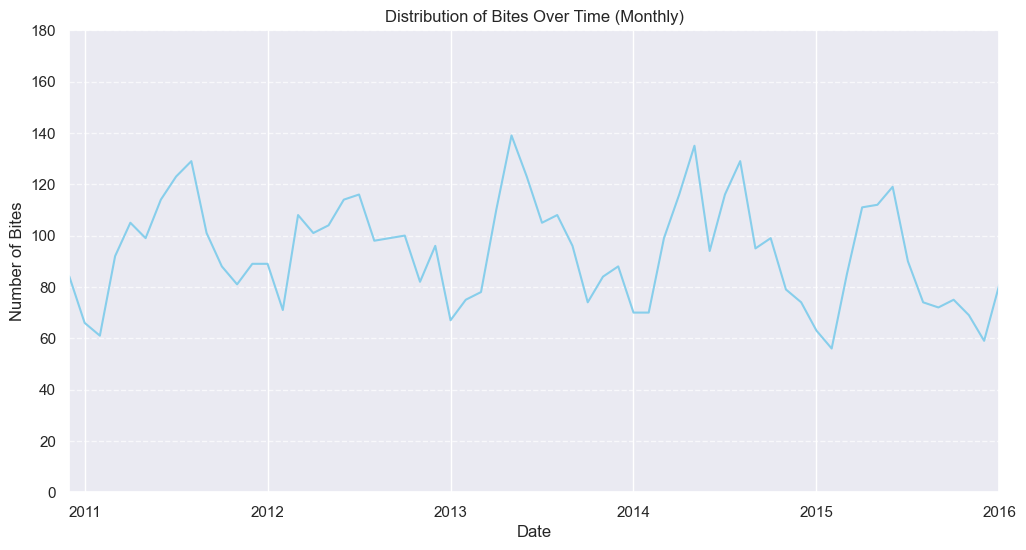

In [199]:
# Timeline of Bites (Monthly)

# Resample the data to daily frequency and count the number of bites per month
daily_distribution = bite.resample('M').size()

# Define the start and end dates
start_date = '2010-12-31'
end_date = '2016-01-01'

# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Plot the distribution
plt.figure(figsize=(12, 6))
daily_distribution.plot(color='skyblue')
plt.title('Distribution of Bites Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Bites')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlim(start_date, end_date) #remove if you don't want to limit the graph
plt.ylim(0, 180) #remove if you don't want to limit the graph

plt.show()